# Data Augmentation
ref: https://towardsdatascience.com/tensorflow-image-augmentation-on-gpu-bf0eaac4c967

origin image
(447, 294, 3)


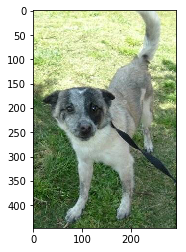

random crop
(300, 200, 3)


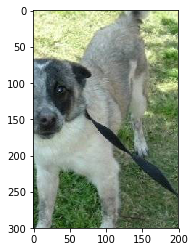

flip
(447, 294, 3)


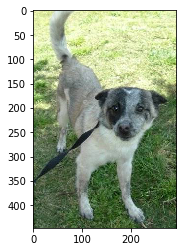

flip
(447, 294, 3)


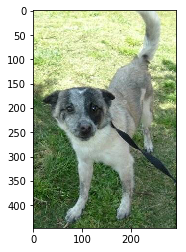

adjust brightness
(447, 294, 3)


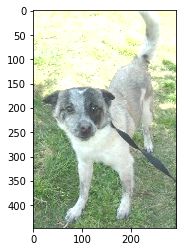

In [45]:
%matplotlib inline
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 
raw_image = Image.open('read_data/A.jpg')
raw_image = np.asarray(raw_image)
print('origin image')
print(raw_image.shape)
plt.imshow(raw_image)
plt.show()

rand_crop_img = tf.random_crop(raw_image, [300,200,3])
flip_img = tf.image.random_flip_left_right(raw_image) # 50% will flip image
bright_img = tf.image.adjust_brightness(raw_image, delta= 0.2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    img_ = sess.run(rand_crop_img)
    print('random crop')
    print(img_.shape)
    plt.imshow(img_)
    plt.show()
    
    img_ = sess.run(flip_img)
    print('flip')
    print(img_.shape)
    plt.imshow(img_)
    plt.show()

    
    img_ = sess.run(flip_img)
    print('flip')
    print(img_.shape)
    plt.imshow(img_)
    plt.show()
    
    img_ = sess.run(bright_img)
    print('adjust brightness')
    print(img_.shape)
    plt.imshow(img_)
    plt.show()

# variable scope and name scope
- variable scope: use for shared parameters (usually accompany with tf.get_variable)
- name scope: use for easily manage variable name(same node under same name scope in tensorboard)

ref: https://blog.csdn.net/Jerr__y/article/details/70809528

In [2]:
import tensorflow as tf

sess = tf.Session()
v1 = tf.placeholder(tf.float32, shape=[2,3,4]) 
print(v1.name)
v1 = tf.placeholder(tf.float32, shape=[2,3,4], name='ph') 
print(v1.name) 
v1 = tf.placeholder(tf.float32, shape=[2,3,4], name='ph') 
print(v1.name) 
print(type(v1))
print(v1)

/home/isaac/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Placeholder:0
ph:0
ph_1:0
<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("ph_1:0", shape=(2, 3, 4), dtype=float32)


In [3]:
v2 = tf.Variable([1,2], dtype=tf.float32) 
print(v2.name) 
v2 = tf.Variable([1,2], dtype=tf.float32, name='V') 
print(v2.name) 
v2 = tf.Variable([1,2], dtype=tf.float32, name='V') 
print(v2.name) 
print(type(v2)) 
print(v2)

Variable:0
V:0
V_1:0
<class 'tensorflow.python.ops.variables.RefVariable'>
<tf.Variable 'V_1:0' shape=(2,) dtype=float32_ref>


In [4]:
v3 = tf.get_variable(name='gv', shape=[])  
print(v3.name)
v3 = tf.get_variable(name='gv', shape=[2])
print(v3.name)

gv:0


ValueError: Variable gv already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-4-e477ef445e48>", line 1, in <module>
    v3 = tf.get_variable(name='gv', shape=[])
  File "/home/isaac/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/home/isaac/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):


In [5]:
import tensorflow as tf
tf.reset_default_graph()
with tf.name_scope('nsc1'):
    v1 = tf.Variable([1], name='v1') 
    with tf.variable_scope('vsc1'):
        v2 = tf.Variable([1], name='v2')
        v3 = tf.get_variable(name='v3', shape=[])
        print('v1.name: {}'.format(v1.name)) 
        print('v2.name: {}'.format(v2.name))
        print('v3.name: {}'.format(v3.name))
        
with tf.name_scope('nsc1'):
    v4 = tf.Variable([1], name='v4')
    print('v4.name: {}'.format(v4.name))


v1.name: nsc1/v1:0
v2.name: nsc1/vsc1/v2:0
v3.name: vsc1/v3:0
v4.name: nsc1_1/v4:0


In [8]:
import tensorflow as tf 
tf.reset_default_graph()

sess = tf.Session(config=config) 
def my_image_filter(): 
    conv1_weights = tf.Variable(tf.random_normal([5, 5, 32, 32]), name="conv1_weights") 
    conv1_biases = tf.Variable(tf.zeros([32]), name="conv1_biases") 
    conv2_weights = tf.Variable(tf.random_normal([5, 5, 32, 32]), name="conv2_weights") 
    conv2_biases = tf.Variable(tf.zeros([32]), name="conv2_biases") 
    return None # First call creates one set of 4 variables. 

result1 = my_image_filter() # Another set of 4 variables is created in the second call. 
result2 = my_image_filter() 
vs = tf.trainable_variables() 

print('There are {} train_able_variables in the Graph: '.format(len(vs)))
for v in vs:
    print(v)


There are 8 train_able_variables in the Graph: 
<tf.Variable 'conv1_weights:0' shape=(5, 5, 32, 32) dtype=float32_ref>
<tf.Variable 'conv1_biases:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'conv2_weights:0' shape=(5, 5, 32, 32) dtype=float32_ref>
<tf.Variable 'conv2_biases:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'conv1_weights_1:0' shape=(5, 5, 32, 32) dtype=float32_ref>
<tf.Variable 'conv1_biases_1:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'conv2_weights_1:0' shape=(5, 5, 32, 32) dtype=float32_ref>
<tf.Variable 'conv2_biases_1:0' shape=(32,) dtype=float32_ref>


In [15]:
%reset
import tensorflow as tf 
tf.reset_default_graph()

sess = tf.Session() 
def my_image_filter():
    with tf.variable_scope("conv1"):
        conv1_weights = tf.get_variable("conv1_weights", [5, 5, 32, 32], initializer=tf.random_normal_initializer())
        conv1_biases = tf.get_variable("conv1_biases", [32], initializer=tf.constant_initializer(0.0))

    with tf.variable_scope("conv2"):
        conv2_weights = tf.get_variable("conv2_weights", [5, 5, 32, 32], initializer=tf.random_normal_initializer())
        conv2_biases = tf.get_variable("conv2_biases", [32], initializer=tf.constant_initializer(0.0))

    return None # First call creates one set of 4 variables. 

with tf.variable_scope("image_filters") as scope:
    result1 = my_image_filter() # Another set of 4 variables is created in the second call.
    scope.reuse_variables()
    result2 = my_image_filter() 
    vs = tf.trainable_variables() 

print('There are {} train_able_variables in the Graph: '.format(len(vs)))
for v in vs:
    print(v)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
There are 4 train_able_variables in the Graph: 
<tf.Variable 'image_filters/conv1/conv1_weights:0' shape=(5, 5, 32, 32) dtype=float32_ref>
<tf.Variable 'image_filters/conv1/conv1_biases:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'image_filters/conv2/conv2_weights:0' shape=(5, 5, 32, 32) dtype=float32_ref>
<tf.Variable 'image_filters/conv2/conv2_biases:0' shape=(32,) dtype=float32_ref>
